In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [213]:
train_data=pd.read_csv(r'D:\kaggle\train.csv')
test_data=pd.read_csv(r'D:\kaggle\test.csv')


In [214]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [215]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [216]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [217]:
train_data.shape

(891, 12)

In [218]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [219]:
test_data.shape

(418, 11)

In [220]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [221]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [222]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

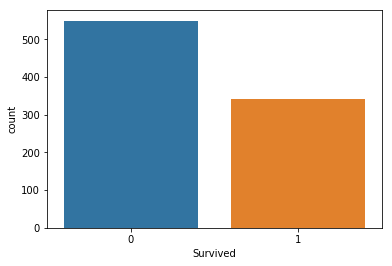

In [223]:
sns.countplot(x="Survived",data=train_data)

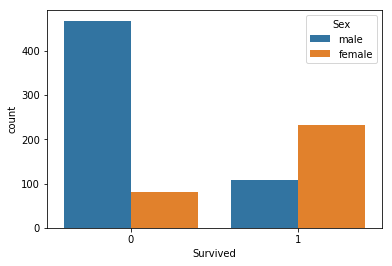

In [224]:
sns.countplot(x="Survived",hue="Sex",data=train_data)

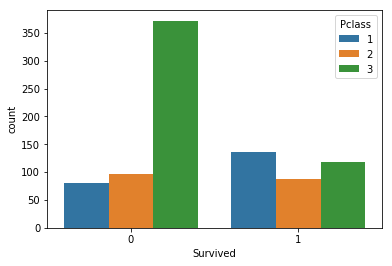

In [225]:
sns.countplot(x="Survived",hue="Pclass",data=train_data)

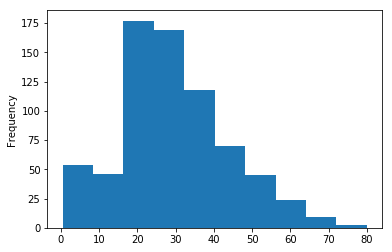

In [226]:
train_data["Age"].plot.hist()

In [227]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [228]:
test_data.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True,False


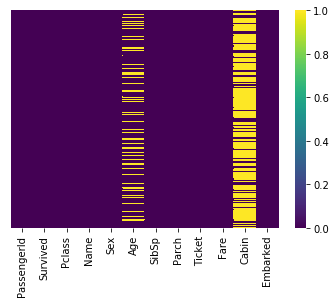

In [229]:
sns.heatmap(train_data.isnull(), yticklabels=False,cmap="viridis")

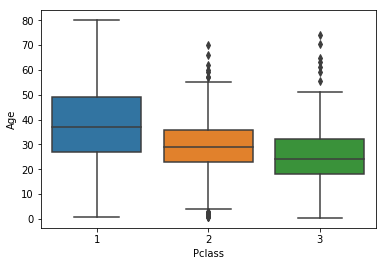

In [230]:
sns.boxplot(x="Pclass",y="Age",data=train_data)

In [231]:
train_data.drop("Cabin",axis=1,inplace=True)

In [232]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [233]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [234]:
test_data.drop("Cabin",axis=1,inplace=True)

In [235]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [236]:
train_data.dropna(inplace=True)

In [237]:
test_data.dropna(inplace=True)

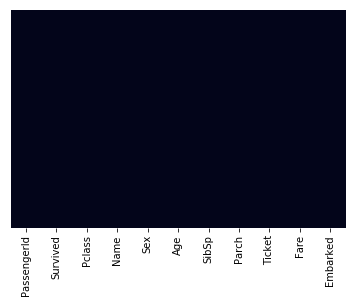

In [238]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

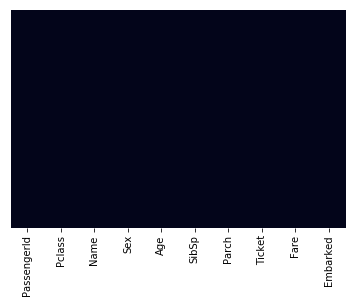

In [239]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False)

In [240]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [241]:
Sex=pd.get_dummies(train_data["Sex"],drop_first=True)
Embarked=pd.get_dummies(train_data["Embarked"],drop_first=True)
pcl=pd.get_dummies(train_data["Pclass"],drop_first=True)
train_data=pd.concat([train_data,Sex,Embarked,pcl],axis=1)


In [242]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0


In [243]:
train_data=train_data.drop(['Sex','Name','Embarked','Ticket'],axis=1)

In [244]:
train_data.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0


In [245]:
sex=pd.get_dummies(test_data["Sex"],drop_first=True)
embarked=pd.get_dummies(test_data["Embarked"],drop_first=True)
Pcl=pd.get_dummies(test_data["Pclass"],drop_first=True)
test_data=pd.concat([test_data,sex,embarked,Pcl],axis=1)


In [246]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1


In [247]:
test_data=test_data.drop(['Sex','Name','Embarked','Ticket'],axis=1)

In [248]:
test_data.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,3,34.5,0,0,7.8292,1,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,0,1


In [249]:
X=train_data.drop("Survived",axis=1)
y=train_data["Survived"]

In [250]:
X.shape

(712, 11)

In [251]:
y.shape

(712,)

In [294]:
from sklearn.model_selection import train_test_split


In [360]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [361]:
from sklearn.tree import DecisionTreeRegressor


In [362]:
clf=DecisionTreeRegressor(random_state=1)

In [363]:
clf.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [364]:
prediction=clf.predict(X_test)

In [365]:
from sklearn.metrics import classification_report

In [366]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.79      0.76      0.78       126\n           1       0.68      0.72      0.70        88\n\n   micro avg       0.74      0.74      0.74       214\n   macro avg       0.74      0.74      0.74       214\nweighted avg       0.75      0.74      0.74       214\n'

In [367]:
from sklearn.metrics import confusion_matrix

In [368]:
confusion_matrix(y_test,prediction)

array([[96, 30],
       [25, 63]], dtype=int64)

In [369]:
from sklearn.metrics import accuracy_score

In [370]:
accuracy_score(y_test,prediction)

0.7429906542056075

In [371]:
submissions = pd.DataFrame({
        "Passengerid":X_test["PassengerId"],
        "Survived": prediction
    })
submissions.to_csv('submissions.csv', index=False)


In [357]:
submissions = pd.read_csv('submissions.csv')


In [358]:
submissions.head()

,Passengerid,Survived
0,690,1.0
1,280,1.0
2,509,1.0
3,10,0.0
4,497,1.0


In [359]:
submissions.shape


(356, 2)